In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> **Exercise 2 (take home)** 
* Experiment with other querying techniques using pandas dataframes. 
* Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
# query 方法一 
X.query('category_name == "soc.religion.christian"')

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


In [5]:
# query 方法二
X.query('"sci.med" in category_name')

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [6]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series
dummy_series.to_frame().T
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

2258

In [7]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [8]:
X.dropna(inplace=True)

In [9]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [10]:
len(X)

2257

___

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [13]:
# Answer here
for i in NA_df['missing_example']:
    print(type(i))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Answer for Exercise 5 (take home)
* We can see that for `index = 2, 3,5` the `isnull()` function doesn't works.
* I print the type of each element in `NA_df['missing_example']` and find that the type of `index = 2, 3,5` is `<class 'str'>`. 
* If we replace them by not string, the `isnull()` function works.    
* Demo is showed below and the they are all True.


In [14]:
from math import nan
import numpy as np

NA_dict_2 = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': nan  },
           { 'id': 'D', 'missing_example': None },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F',      }]

NA_dict_2 = pd.DataFrame(NA_dict_2, columns = ['id','missing_example'])
NA_dict_2['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

In [15]:
X.duplicated()
sum(X.duplicated())
sum(X.duplicated('text'))
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [16]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [17]:
len(X)

2259

In [18]:
X_init = X.copy()

In [19]:
sum(X.duplicated('text'))

1

In [20]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [21]:
len(X)

2257

In [22]:
len(X_init)

2259

___

### >>> **Exercise 6 (take home)**  
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [23]:
X_sample = X.sample(n=1000) #random state
X_sample[0:4]

,text,category,category_name
1514,From: amigan@cup.portal.com (Mike - Medwid) Su...,2,sci.med
2112,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med
221,From: MNHCC@cunyvm.bitnet (Marty Helgesen) Sub...,3,soc.religion.christian
133,From: mserv@mozart.cc.iup.edu (Mail Server) Su...,3,soc.religion.christian


In [24]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


Ans : 順序根長度都不一樣，X_sample 長度跟順序都沒有固定，而 X 有。

____

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

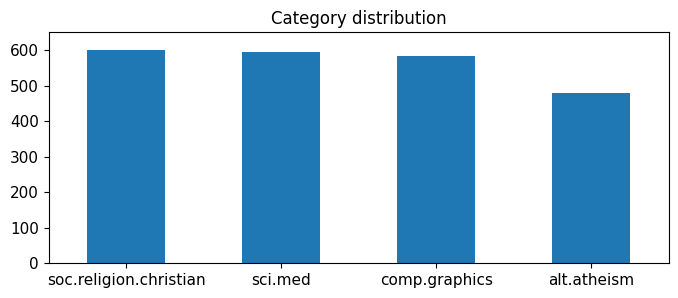

In [27]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   280
comp.graphics             256
soc.religion.christian    248
alt.atheism               216
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

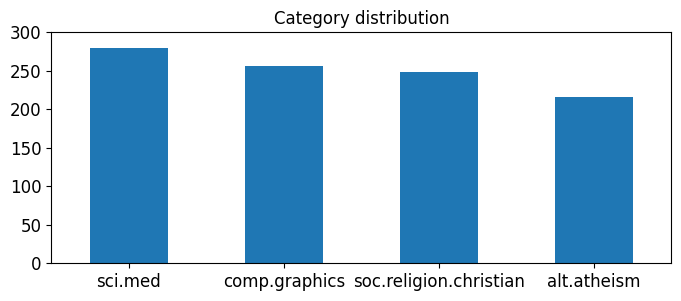

In [28]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

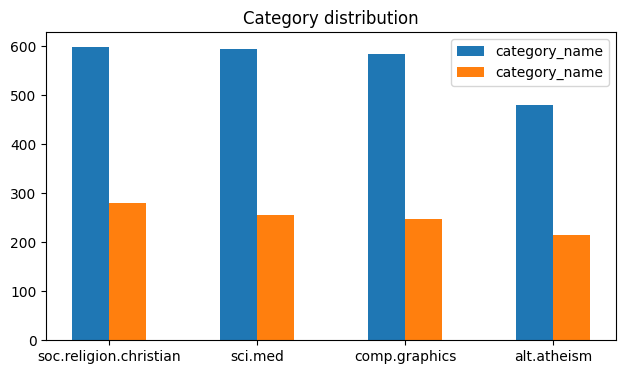

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 4))

# 造出 x 軸的刻度標籤、數據
labels = X.category_name.value_counts().index.to_list()
first = X.category_name.value_counts().to_list()
second = X_sample.category_name.value_counts().to_list()

# 兩組數據
plt.subplot(131)
x = np.arange(len(labels))  # x軸的標籤
width = 0.25  # 柱子的寬度

plt.bar(x - width/2, first, width, label='category_name')
plt.bar(x + width/2, second, width, label='category_name')
plt.title('Category distribution')
# x軸刻度表示
plt.xticks(x, labels=labels)
plt.legend()

plt.show()


___

In [30]:
import nltk

In [31]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
# print(X_counts[0])

In [33]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [34]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [35]:
count_vect.get_feature_names_out()[0]

'00'

### **>>> Exercise 10 (take home)**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [36]:
item = X_counts[4, 0:100].toarray()[0]
item_index = np.where(item == 1)    #查找元素值為1的位置
count_vect.get_feature_names_out()[item_index][-1] #第一個是前面看到的00 最後一個才是中間那個1

'01'

____

In [37]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [38]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [39]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

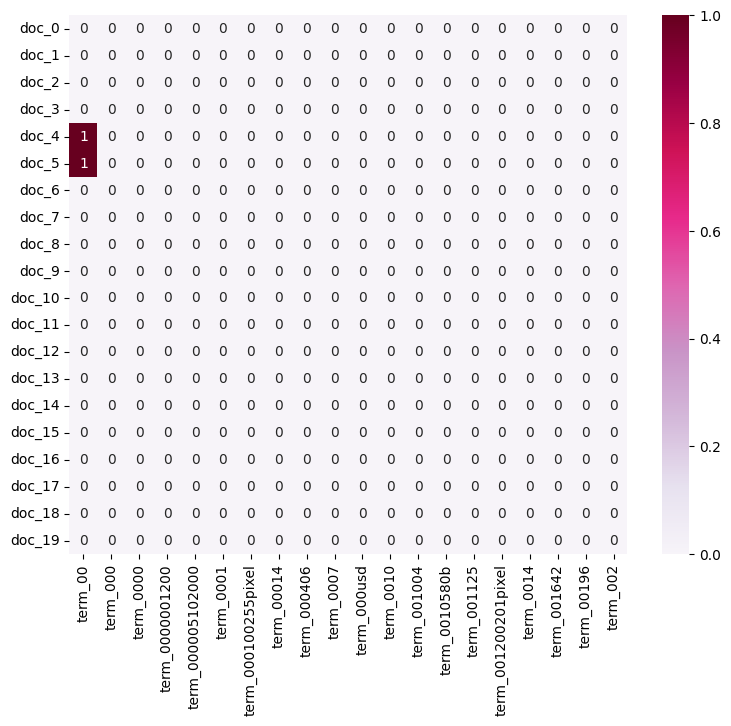

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home)** 
* From the chart above, we can see how sparse the term-document matrix is; 
i.e., there is only one terms with frequency of `1` in the subselection of the matrix. 
* By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. 
* As an excersise you can try to modify the code above to plot `the entire term-document matrix` or `just a sample of it`.
*  How would you do this efficiently? 
*  Remember there is a lot of words in the vocab. 
*  Report below what methods you would use to get a nice and useful visualization

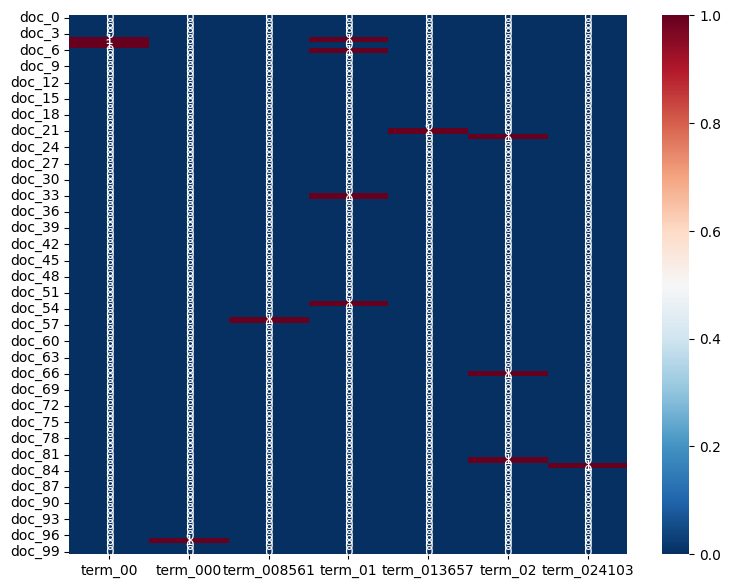

In [41]:
idx = np.argwhere(np.all( X_counts[0:100,0:100].toarray()== 0, axis=0)) 
X_counts_table = np.delete(X_counts[0:100,0:100].toarray(), idx, axis = 1)
count_vect_string = np.delete(count_vect.get_feature_names_out()[0:100], idx)


plot_x = ["term_"+str(i) for i in count_vect_string[:]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts_table[:, :]
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="RdBu_r",
                 vmin=0, vmax=1, annot=True)

_____

In [42]:
from sklearn.decomposition import PCA

In [43]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 2)

In [44]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

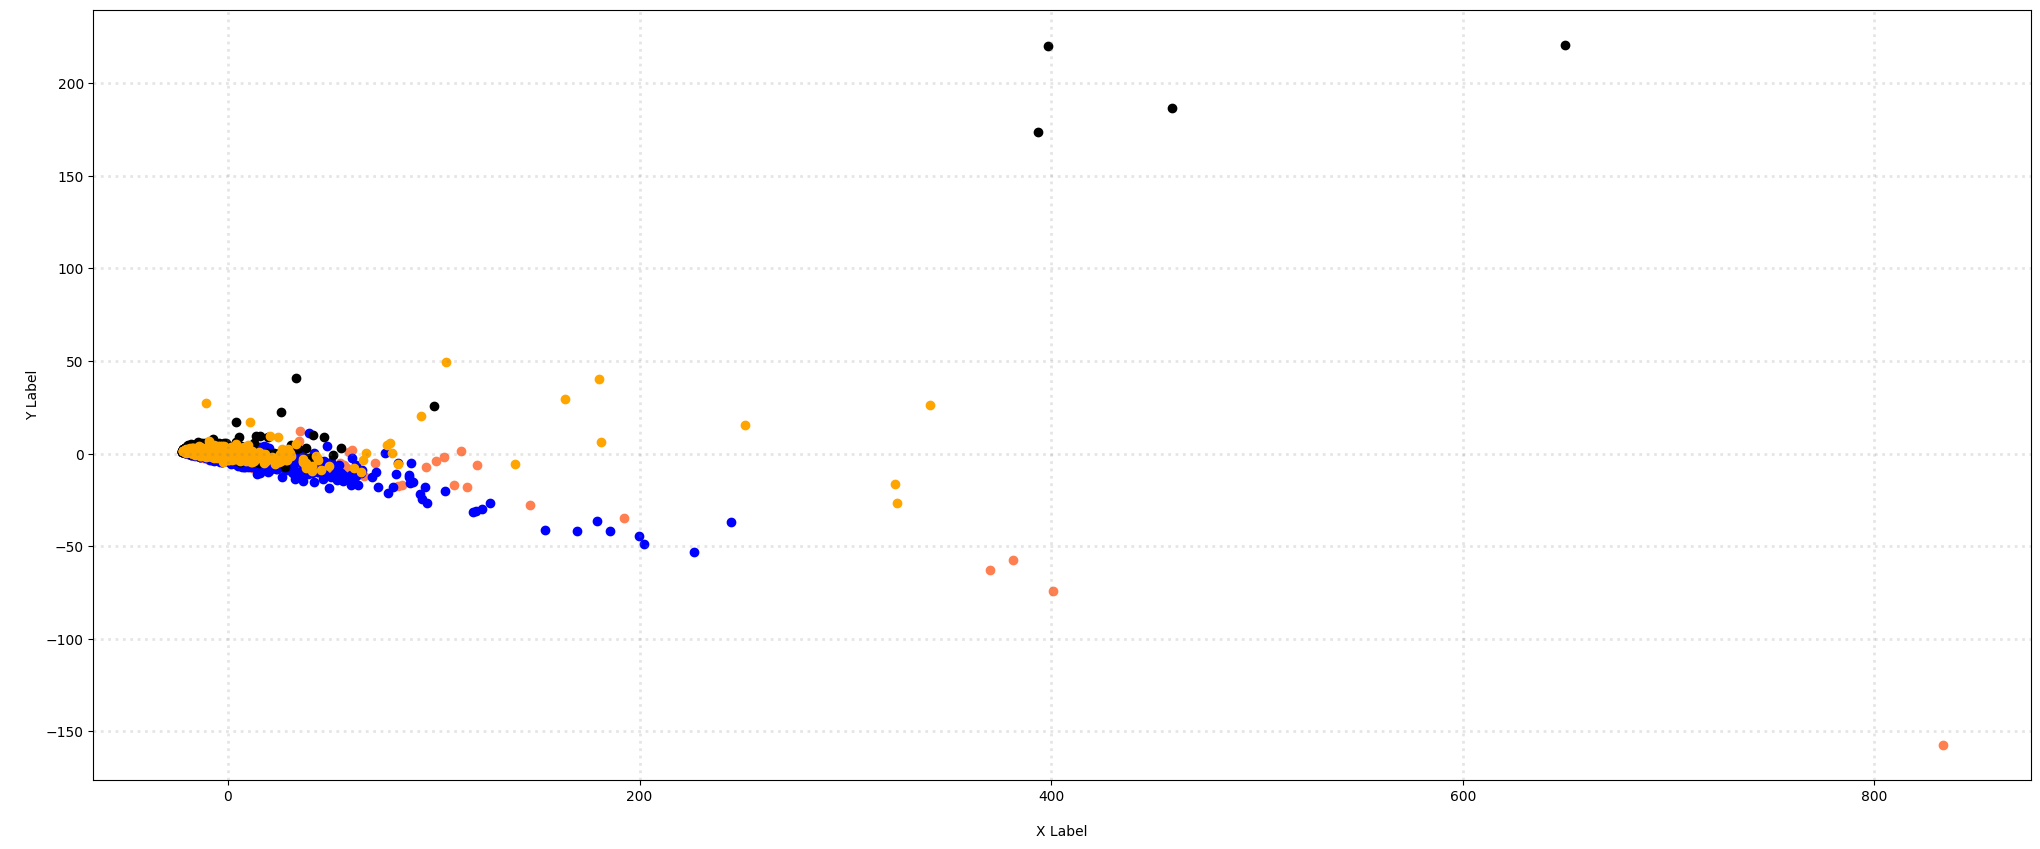

In [45]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> **Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [46]:
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3d.shape

(2257, 3)

C:\Users\penny\AppData\Local\Temp\ipykernel_35240\2740749786.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


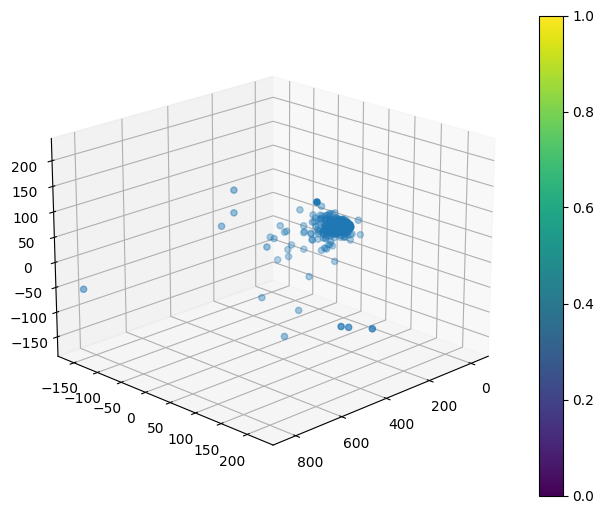

In [47]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=20,     #仰角
             azim=45     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

C:\Users\penny\AppData\Local\Temp\ipykernel_35240\1051323714.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


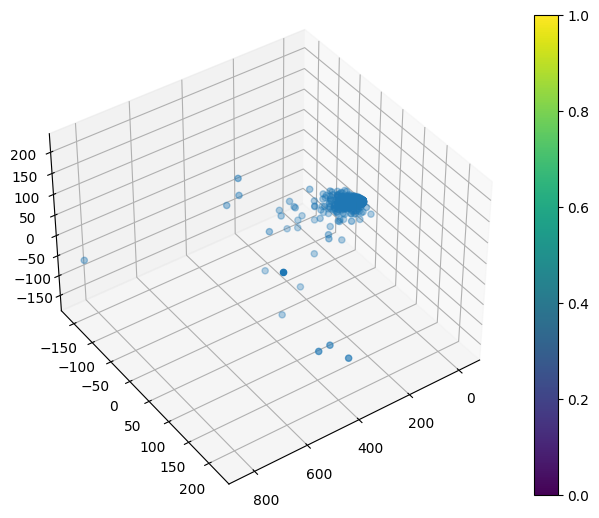

In [48]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=40,     #仰角
             azim=55     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

C:\Users\penny\AppData\Local\Temp\ipykernel_35240\1063838499.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


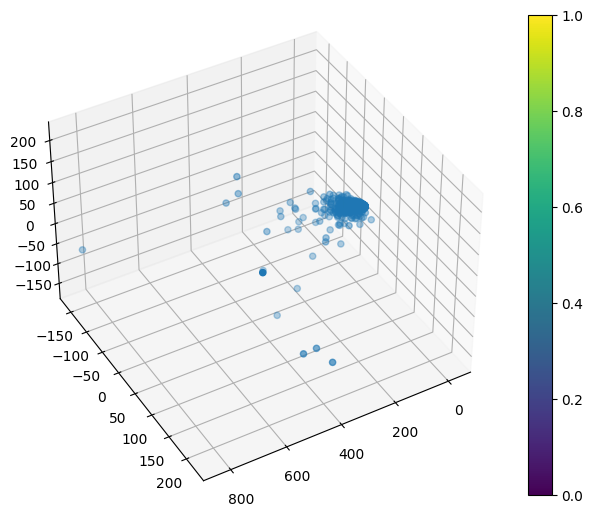

In [49]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=40,     #仰角
             azim=60     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

_____

In [50]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [51]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

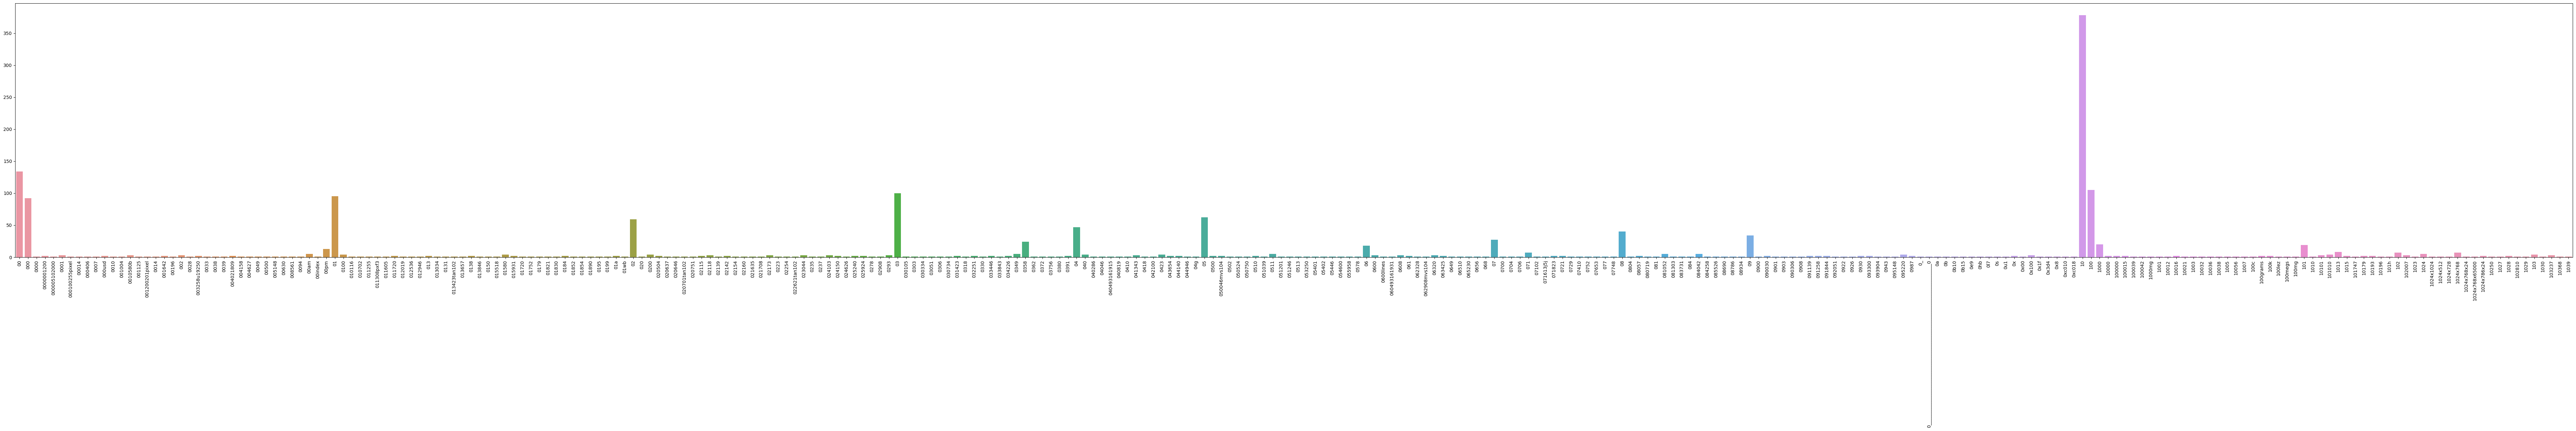

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [53]:
import plotly.express as px
fig = px.bar( x=count_vect.get_feature_names_out()[:300],y=term_frequencies[:300], 
             labels={'y':'','x':''})
fig.show()

____

### >>> **Exercise 14 (take home)** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. 
* Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [54]:
term_frequencies_shift =  term_frequencies[:300] - 1
count_vect_new = []
term_frequencies_new = [] 
for vect , freq in zip(count_vect.get_feature_names_out()[:300],term_frequencies_shift):  
    if freq > 0:
        count_vect_new.append(vect)
        term_frequencies_new.append(freq)

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000001200'),
 Text(3, 0, '0001'),
 Text(4, 0, '000usd'),
 Text(5, 0, '0010580b'),
 Text(6, 0, '001642'),
 Text(7, 0, '002'),
 Text(8, 0, '003258u19250'),
 Text(9, 0, '004021809'),
 Text(10, 0, '00am'),
 Text(11, 0, '00pm'),
 Text(12, 0, '01'),
 Text(13, 0, '0100'),
 Text(14, 0, '011720'),
 Text(15, 0, '013'),
 Text(16, 0, '0138'),
 Text(17, 0, '01580'),
 Text(18, 0, '015931'),
 Text(19, 0, '0184'),
 Text(20, 0, '01a'),
 Text(21, 0, '02'),
 Text(22, 0, '0200'),
 Text(23, 0, '020504'),
 Text(24, 0, '02115'),
 Text(25, 0, '02118'),
 Text(26, 0, '02142'),
 Text(27, 0, '02173'),
 Text(28, 0, '023044'),
 Text(29, 0, '024103'),
 Text(30, 0, '024150'),
 Text(31, 0, '025240'),
 Text(32, 0, '025924'),
 Text(33, 0, '0293'),
 Text(34, 0, '03'),
 Text(35, 0, '031423'),
 Text(36, 0, '032251'),
 Text(37, 0, '033446'),
 Text(38, 0, '034226'),
 Text(39, 0, '0349'),
 Text(40, 0, '0358'),
 Text(41, 0, '0391'),
 Text(42, 0, '04'),
 Text(43, 0, '040'),
 

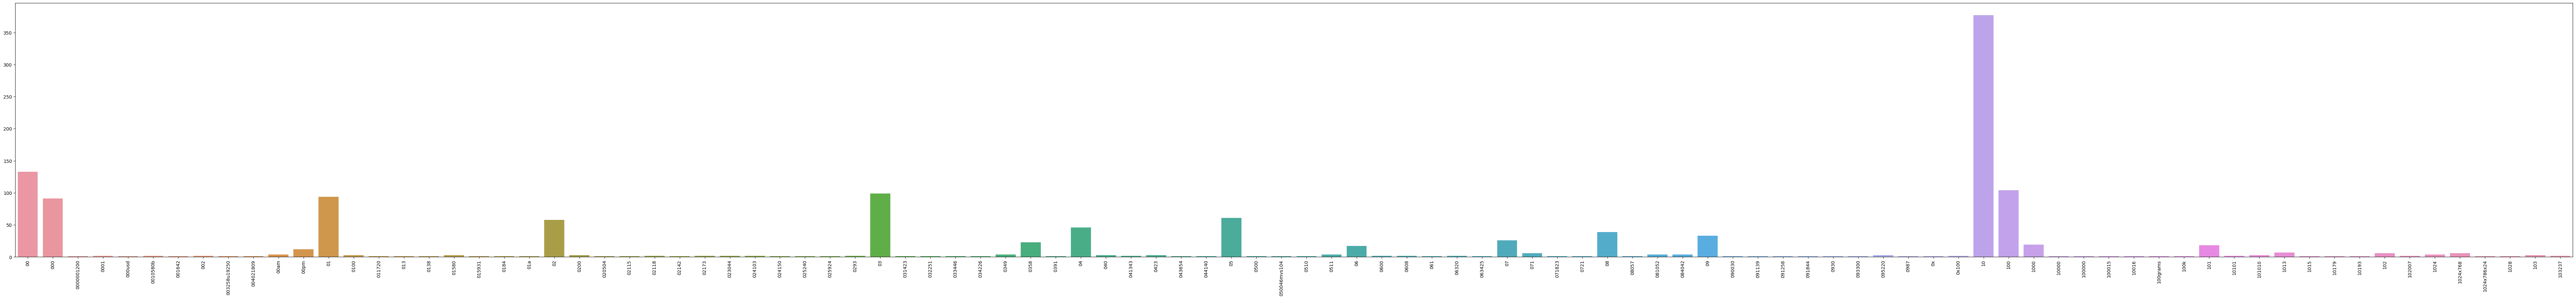

In [55]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new, 
            y=term_frequencies_new)
g.set_xticklabels(count_vect_new, rotation = 90)

___

### >>> **Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [56]:
count_vect_sorted, term_frequencies_sorted = (list(t) for t in zip(*sorted(zip( term_frequencies[:300], count_vect.get_feature_names_out()[:300]))))

In [57]:
count_vect_sorted.reverse()
term_frequencies_sorted.reverse()

[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '1024x768'),
 Text(19, 0, '102'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '084042'),
 Text(23, 0, '081052'),
 Text(24, 0, '0511'),
 Text(25, 0, '0349'),
 Text(26, 0, '00am'),
 Text(27, 0, '103'),
 Text(28, 0, '101010'),
 Text(29, 0, '095220'),
 Text(30, 0, '0423'),
 Text(31, 0, '040'),
 Text(32, 0, '0200'),
 Text(33, 0, '01580'),
 Text(34, 0, '0100'),
 Text(35, 0, '103237'),
 Text(36, 0, '102007'),
 Text(37, 0, '10101'),
 Text(38, 0, '0x100'),
 Text(39, 0, '06320'),
 Text(40, 0, '0608'),
 Text(41, 0, '0600'),
 Text(42, 0, '041343'),
 Text(43, 0, '0293'),
 Text(44, 0, '024103'),
 Text(45, 0, '023044'),
 

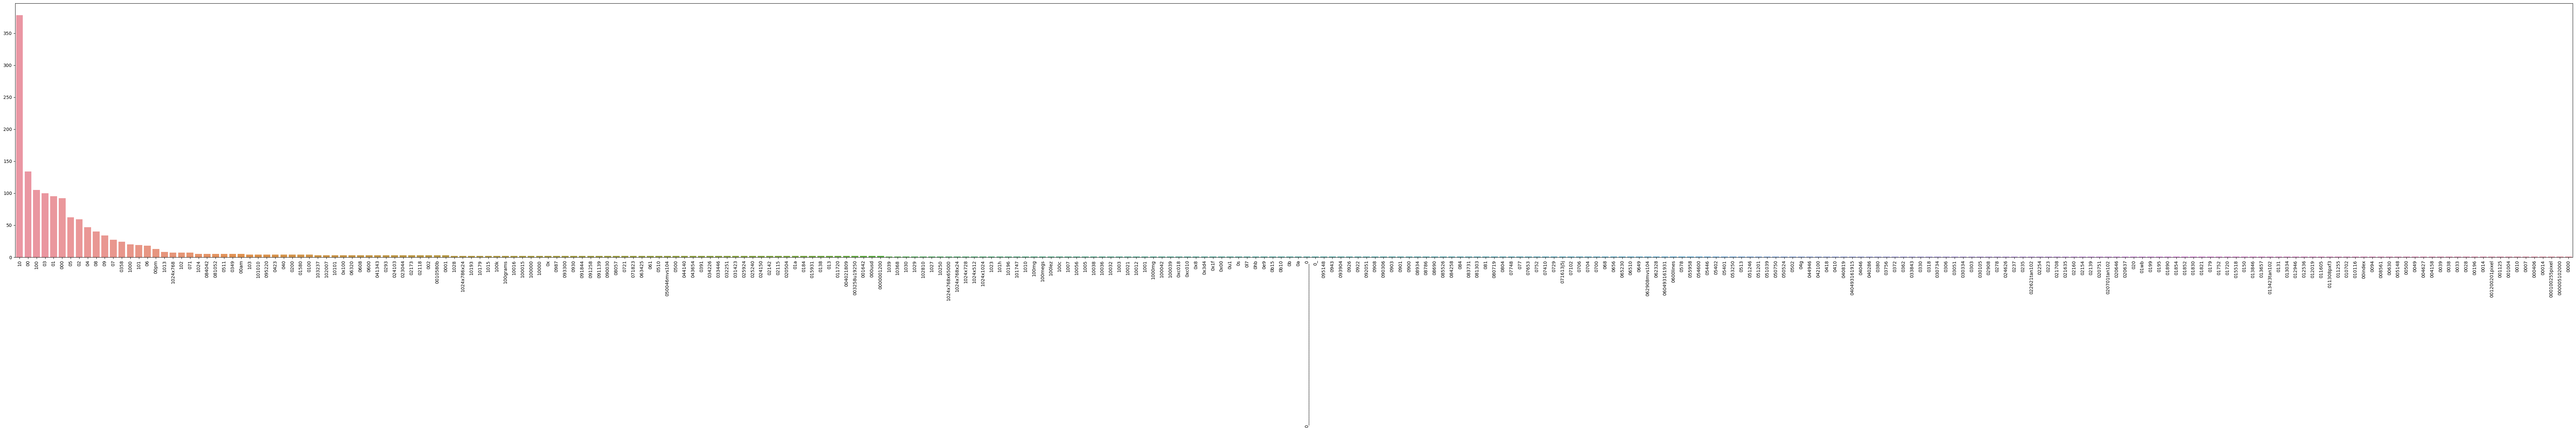

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term_frequencies_sorted, 
            y=count_vect_sorted)
g.set_xticklabels(term_frequencies_sorted, rotation = 90)

____

In [59]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

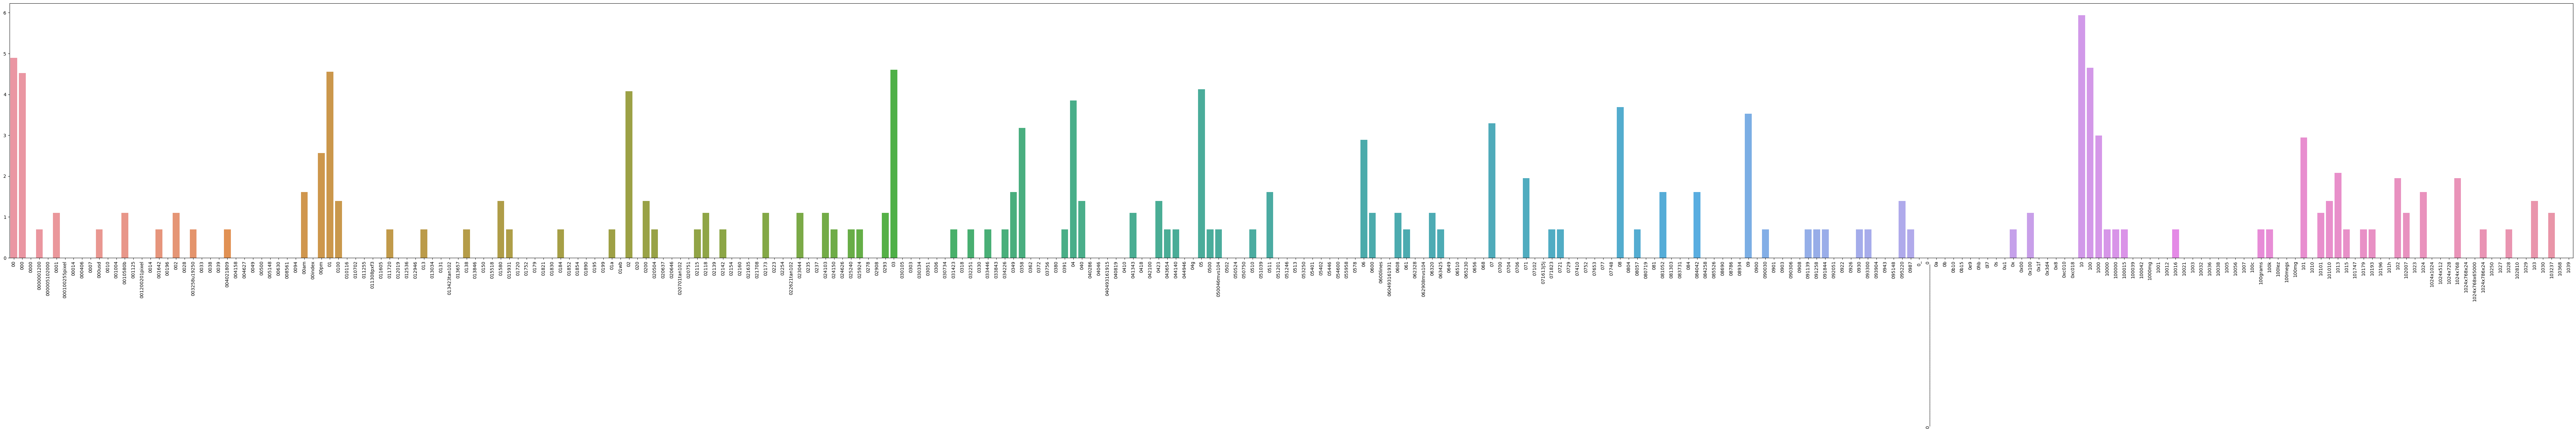

In [60]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['category_name'] = mlb.transform(X['category_name']).tolist()
X
# It works !

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,"[0, 1, 0, 0]","[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,"[0, 1, 0, 0]","[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,"[0, 0, 0, 1]","[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,"[0, 0, 0, 1]","[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,"[0, 0, 0, 1]","[From, :, stanly, @, grok11.columbiasc.ncr.com..."
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,"[0, 0, 1, 0]","[From, :, roos, @, Operoni.Helsinki.FI, (, Chr..."
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,"[0, 0, 1, 0]","[From, :, mhollowa, @, ic.sunysb.edu, (, Micha..."
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,"[0, 0, 1, 0]","[From, :, sasghm, @, theseus.unx.sas.com, (, G..."
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,"[0, 0, 1, 0]","[From, :, Dan, Wallach, <, dwallach, @, cs.ber..."
